# ML Classification

<h3> Preparation </h3>

**Binary target class:** *Obesity_level*

**Input variables:** *Family_history_overweight, High_caloric_food, Veggie_consumption_freq, Food_between_meals_freq, Monitors_calories, Physical_activity*

In [81]:
import pandas as pd
import numpy as np

df = pd.read_csv("../assets/ObesityDataSet_with_BMI.csv", sep=",")
df.head()

,Gender,Age,Height,Weight,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Main_meals_count,Food_between_meals_freq,Smokes,Water_consumption,Monitors_calories,Physical_activity,Screen_time,Alcohol_consumption_freq,Transportation_mode,Obesity_level,BMI
0,Female,21,1.62,64.0,True,False,Sometimes,Three,Sometimes,False,Between 1 and 2 L,False,I do not,3-5 hours,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,1.52,56.0,True,False,Always,Three,Sometimes,True,More than 2 L,True,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,1.80,77.0,True,False,Sometimes,Three,Sometimes,False,Between 1 and 2 L,False,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,1.80,87.0,False,False,Always,Three,Sometimes,False,Between 1 and 2 L,False,2 or 4 days,0-2 hours,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,1.78,89.8,False,False,Sometimes,Between 1 and 2,Sometimes,False,Between 1 and 2 L,False,I do not,0-2 hours,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [82]:
df = df[["Age","Family_history_overweight", "High_caloric_food", "Veggie_consumption_freq", "Food_between_meals_freq", "Alcohol_consumption_freq", "Monitors_calories", "Physical_activity", "Obesity_level"]]
df.head()

,Age,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Food_between_meals_freq,Alcohol_consumption_freq,Monitors_calories,Physical_activity,Obesity_level
0,21,True,False,Sometimes,Sometimes,no,False,I do not,Normal_Weight
1,21,True,False,Always,Sometimes,Sometimes,True,4 or 5 days,Normal_Weight
2,23,True,False,Sometimes,Sometimes,Frequently,False,2 or 4 days,Normal_Weight
3,27,False,False,Always,Sometimes,Frequently,False,2 or 4 days,Overweight_Level_I
4,22,False,False,Sometimes,Sometimes,Sometimes,False,I do not,Overweight_Level_II


In [83]:
X = df.copy()
X["Alcohol_consumption_freq"] = X["Alcohol_consumption_freq"].map({"no": 1,"Sometimes": 2, "Frequently": 3, "Always": 4})
X["Family_history_overweight"] = X["Family_history_overweight"].astype(int)
X["High_caloric_food"] = X["High_caloric_food"].astype(int)
X["Veggie_consumption_freq"] = X["Veggie_consumption_freq"].map({"Never": 1,"Sometimes": 2, "Always": 3})
X["Food_between_meals_freq"] = X["Food_between_meals_freq"].map({"no": 1,"Sometimes": 2, "Frequently": 3, "Always": 4})
X["Monitors_calories"] = X["Monitors_calories"].astype(int)
X["Physical_activity"] = X["Physical_activity"].map({"I do not" :0, "1 or 2 days": 1, "2 or 4 days": 2, "4 or 5 days": 3})
X["Obesity_level"] = X["Obesity_level"].map({"Insufficient_Weight": 0, "Normal_Weight": 1, "Overweight_Level_I": 2, "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6})
X.head()

,Age,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Food_between_meals_freq,Alcohol_consumption_freq,Monitors_calories,Physical_activity,Obesity_level
0,21,1,0,2,2,1,0,0,1
1,21,1,0,3,2,2,1,3,1
2,23,1,0,2,2,3,0,2,1
3,27,0,0,3,2,3,0,2,2
4,22,0,0,2,2,2,0,0,3


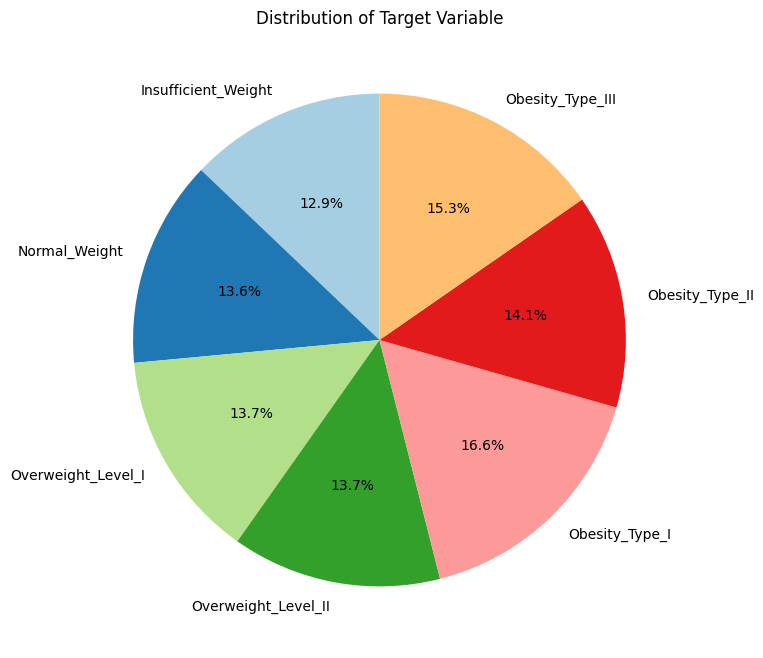

In [84]:
# Pie plot of the target class distribution with string labels
from matplotlib import pyplot as plt

# Map integer codes back to string labels for plotting
obesity_labels = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
counts = X["Obesity_level"].value_counts().sort_index()
plt.figure(figsize=(8, 8))
counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=obesity_labels,
    colors=plt.cm.Paired.colors
)
plt.ylabel("")
plt.title("Distribution of Target Variable")
plt.show()


In [85]:
import numpy as np

array_X = X.to_numpy()
array_y = array_X[:, 8]
array_X = array_X[:, 0:8]

print(array_X)

[[21  1  0 ...  1  0  0]
 [21  1  0 ...  2  1  3]
 [23  1  0 ...  3  0  2]
 ...
 [23  1  1 ...  2  0  1]
 [24  1  1 ...  2  0  1]
 [24  1  1 ...  2  0  1]]


In [86]:
from sklearn.model_selection import train_test_split

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    array_X, array_y, test_size=0.2, random_state=20250928, stratify=array_y
)

print("Shape of training set\t", X_train.shape, y_train.shape)
print("Shape of test set\t", X_test.shape, y_test.shape)

Shape of training set	 (1688, 8) (1688,)
Shape of test set	 (423, 8) (423,)


# 4. Evaluation

1.) Dictionary & 2.) Experimental Evaluation

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

models = {
    "DT_4": DecisionTreeClassifier(max_depth=4, random_state=20250928),
    "DT_50": DecisionTreeClassifier(max_depth=500, random_state=20250928),
    "RF_10": RandomForestClassifier(n_estimators=10, max_depth=3,  random_state=20250928),
    "RF_100": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=20250928),
}

In [97]:
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

#Had to set the zero_division=0 parameter to avoid the warning
precision_macro_scorer = make_scorer(precision_score, average="macro", zero_division=0)

scoring_metrics = {
    "accuracy": "accuracy",
    "precision_macro": precision_macro_scorer,
    "recall_macro": "recall_macro",
    "f1_macro": "f1_macro",
}



results_evaluation = pd.DataFrame({
                                    "classifier_name":[],
                                    "fit_time": [],
                                    "score_time": [],
                                    "test_accuracy": [],
                                    "test_precision_macro": [],
                                    "test_recall_macro": [],
                                    "test_f1_macro": [],
                                    })
results_evaluation

for name, classifier in models.items():
    print(f"Currently training the classifier {name}.")


    scores_cv = cross_validate(classifier, X_train, y_train, cv=10, scoring=scoring_metrics)

    
    dict_this_result = {"classifier_name":[name]}

    for metric_name, score_per_fold in scores_cv.items():
        dict_this_result[metric_name] = [ score_per_fold.mean() ]
    this_result = pd.DataFrame(dict_this_result)
    results_evaluation = pd.concat([results_evaluation, this_result], ignore_index=True)

print("The experimental setup has finished")

results_evaluation

Currently training the classifier DT_4.
Currently training the classifier DT_50.
Currently training the classifier RF_10.
Currently training the classifier RF_100.
The experimental setup has finished


,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,DT_4,0.000919,0.002779,0.495858,0.501138,0.482947,0.433766
1,DT_50,0.001522,0.002406,0.640423,0.637561,0.637604,0.632942
2,RF_10,0.007251,0.002922,0.466230,0.492151,0.455898,0.409670
3,RF_100,0.090663,0.005882,0.671210,0.670185,0.668072,0.661307
